# WeatherPy Analysis


* Temperature clearly increases as one approaches the equator (0 degrees latitude).
    * Extremely high temperatures (90 - 100F) are found almost exclusively between -20 and 20 degrees latitude.
    * Extremely low temperatures (below 20F) are extremely concentrated in cities in the northern hemisphere between 40 and 80 degrees latitude.  
    * The sourthern hemisphere has very few cities with a temperature below 40F. 


* There exists no significant relationship between latitude and humidity.
    * The majority of cities sampled have over 60% humidity.
    * Many cities have 100% humidity, especially near the equator and above 40 degrees latitude.


* Wind speed and latitude have no strong relationship between them.
    * Most cities have wind speeds under 10 mph.
    * Wind speeds over 20 mph are uncommon within 20 degrees of the equator. 

----

In [1]:
#dependencies
from citipy import citipy
import openweathermapy.core as owm

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import api_key

## Generate Cities List

In [2]:
#generate random latitudes and longitudes
randomLatitudes = [random.randrange(-90, 90) + random.random() for i in range(1500)]
randomLongitudes = [random.randint(-180, 180) + random.random() for i in range(1500)]

#pair latitudes and longitudes together
coordinates = [(randomLatitudes[i], randomLongitudes[i]) for i in range(len(randomLongitudes))]

In [3]:
#make empty list for city data objects
cityObjs = []

#find nearest city for each pair of coordinates
for coordinatePair in coordinates:
    lat, lon = coordinatePair
    cityObjs.append(citipy.nearest_city(lat, lon))

In [4]:
#format country code and city
country_code = [str(city.country_code).upper() for city in cityObjs]
cityName = [str(city.city_name).title() for city in cityObjs]
cities = [(cityName[i] + "," + country_code[i]) for i in range(len(cityName))]

#find unique cities
uniqueCities = set(cities)
print(f"{len(uniqueCities)} unique cities found.")

632 unique cities found.


## API Calls

In [5]:
#create kwarg for settings
settings = {"units": "imperial", "appid": api_key}

#set empty list to store weather responses
weathers = []
#set process number to 0
processNum = 0

#find weather for each city
##note: this will take a couple minutes
for city in uniqueCities:
    try:
        weather = (owm.get_current(city, **settings))
        weathers.append(weather)
        processNum += 1
        print(f"Processing Record {processNum}: {city}")
    #if no data for city, skip
    except OSError:
        print(f"{city} not found: Skipping")
print("-------------")
print(f"Weather data found for {len(weathers)} cities.")

Processing Record 1: Hoa Binh,VN
Processing Record 2: Manohar Thana,IN
Processing Record 3: Jamestown,SH
Processing Record 4: Port Hawkesbury,CA
Processing Record 5: Manpur,IN
Processing Record 6: Varnamo,SE
Processing Record 7: Funadhoo,MV
Processing Record 8: Olinda,BR
Processing Record 9: Leningradskiy,RU
Tarudant,MA not found: Skipping
Processing Record 10: Steenbergen,NL
Processing Record 11: Maningrida,AU
Processing Record 12: Ternate,ID
Processing Record 13: Yatou,CN
Processing Record 14: Emmett,US
Processing Record 15: Kavieng,PG
Processing Record 16: San Policarpo,PH
Processing Record 17: Yichang,CN
Processing Record 18: Mazatlan,MX
Processing Record 19: Yermakovskoye,RU
Processing Record 20: Brae,GB
Processing Record 21: Bismil,TR
Processing Record 22: Nepomuk,CZ
Goderich,SL not found: Skipping
Processing Record 23: Letchworth,GB
Eskasem,AF not found: Skipping
Processing Record 24: Butaritari,KI
Processing Record 25: Neman,RU
Tsihombe,MG not found: Skipping
Khonuu,RU not foun

Processing Record 206: Kodinsk,RU
Processing Record 207: Ancud,CL
Processing Record 208: Talnakh,RU
Sorvag,FO not found: Skipping
Processing Record 209: Belaya Gora,RU
Processing Record 210: Pangnirtung,CA
Ardistan,IR not found: Skipping
Processing Record 211: Sisophon,KH
Processing Record 212: Wisconsin Rapids,US
Processing Record 213: Pemberton,CA
Processing Record 214: Pevek,RU
Processing Record 215: Sioux Lookout,CA
Processing Record 216: Castro,CL
Warqla,DZ not found: Skipping
Processing Record 217: Graham,US
Processing Record 218: Todos Santos,MX
Processing Record 219: Tamale,GH
Processing Record 220: Hasaki,JP
Processing Record 221: Shambu,ET
Processing Record 222: Springbok,ZA
Processing Record 223: Namatanai,PG
Processing Record 224: Tessalit,ML
Nizhneyansk,RU not found: Skipping
Processing Record 225: Kokoda,PG
Processing Record 226: Bhadasar,IN
Processing Record 227: Deogarh,IN
Kibala,AO not found: Skipping
Processing Record 228: Ilulissat,GL
Skalistyy,RU not found: Skipping

Bur Gabo,SO not found: Skipping
Processing Record 419: Norman Wells,CA
Processing Record 420: Havre-Saint-Pierre,CA
Processing Record 421: Ceuta,ES
Processing Record 422: Chumikan,RU
Gurupa,BR not found: Skipping
Processing Record 423: Necochea,AR
Processing Record 424: Beckley,US
Processing Record 425: Gillette,US
Processing Record 426: Neijiang,CN
Processing Record 427: Beloha,MG
Processing Record 428: Cockburn Town,BS
Processing Record 429: Zenzeli,RU
Processing Record 430: Dicabisagan,PH
Processing Record 431: Rocha,UY
Processing Record 432: Cap Malheureux,MU
Processing Record 433: Liebenburg,DE
Processing Record 434: Lazarev,RU
Processing Record 435: Sivas,TR
Processing Record 436: Huarmey,PE
Utiroa,KI not found: Skipping
Tumannyy,RU not found: Skipping
Processing Record 437: Pozo Colorado,PY
Processing Record 438: Pontianak,ID
Processing Record 439: Moose Factory,CA
Processing Record 440: Narsaq,GL
Processing Record 441: Mangan,IN
Processing Record 442: Thompson,CA
Processing Rec

## Convert Raw Data to DataFrame

In [6]:
#examine a single weather object 
weathers[0]

{'coord': {'lon': 105.34, 'lat': 20.81},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 71.6,
  'pressure': 1016,
  'humidity': 64,
  'temp_min': 71.6,
  'temp_max': 71.6},
 'visibility': 8000,
 'wind': {'speed': 3.36, 'deg': 320},
 'clouds': {'all': 0},
 'dt': 1541161800,
 'sys': {'type': 1,
  'id': 7980,
  'message': 0.0035,
  'country': 'VN',
  'sunrise': 1541113292,
  'sunset': 1541154152},
 'id': 1580830,
 'name': 'Hoa Binh',
 'cod': 200}

In [7]:
#convert raw weather data to data frame and save as csv
rawWeatherData = pd.DataFrame(weathers)
rawWeatherData.to_csv("Output/rawCitiesWeatherData.csv")

In [8]:
#create arg of specific data to examine
summary = ["name", "sys.country", "id", "coord.lat", "main.temp", "main.humidity", "wind.speed", "clouds.all"]

#gather relevant data and convert to data frame
weatherData = [weather(*summary) for weather in weathers]
weatherTable = pd.DataFrame(weatherData)
#rename columns
weatherTable = weatherTable.rename(columns = {0: "City", 1: "Country", 2: "CityID", 3: "Latitude", 4: "Temp", 5: "Humid %", 6: "Wind MPH", 7: "Cloud %"})
weatherTable.head()

,City,Country,CityID,Latitude,Temp,Humid %,Wind MPH,Cloud %
0,Hoa Binh,VN,1580830,20.81,71.60,64,3.36,0
1,Manohar Thana,IN,1263648,24.24,85.62,38,2.93,8
2,Jamestown,SH,3370903,-15.94,67.44,100,12.44,48
3,Port Hawkesbury,CA,6111867,45.62,42.80,93,4.70,90
4,Manpur,IN,1271439,24.80,84.20,66,3.36,0


----
## Plotting the Data

### Latitude vs. Temperature Plot

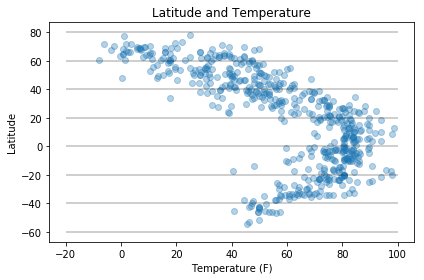

Empty DataFrame
Columns: [City, Country, CityID, Latitude, Temp, Humid %, Wind MPH, Cloud %]
Index: []


In [9]:
#create latitude & temp scatter plot
tempLatFig = plt.figure()
tempLat = plt.subplot()
tempLat.scatter(weatherTable["Temp"], weatherTable["Latitude"], alpha = .333)

#draw hlines for latitude
y_ticks = np.arange(-60, 81, 20)
[plt.hlines(y, -20, 100, alpha=0.25) for y in y_ticks]

#titles and formatting
plt.title("Latitude and Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

#save plot as png
tempLatFig.savefig("Output/latitude and temp.png", bbox_inches="tight")

### Latitude vs. Humidity Plot

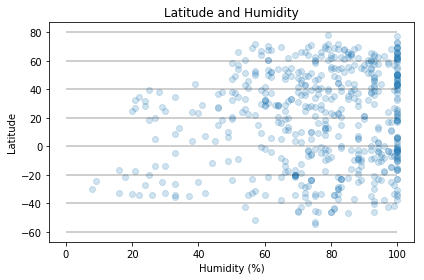

In [10]:
#create latitude & humidty scatter plot
humidLatFig = plt.figure()
humidLat = plt.subplot()
humidLat.scatter(weatherTable["Humid %"], weatherTable["Latitude"], alpha = .2) #alpha lowered to highlight concentration of cities with 100% humidity

#draw hlines for latitude
[plt.hlines(y, 0, 100, alpha=0.25) for y in y_ticks]

#titles and formatting
plt.title("Latitude and Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.tight_layout()
plt.show()

#save plot as png
humidLatFig.savefig("Output/humidity and temp.png", bbox_inches="tight")

### Latitude vs. Cloudiness Plot

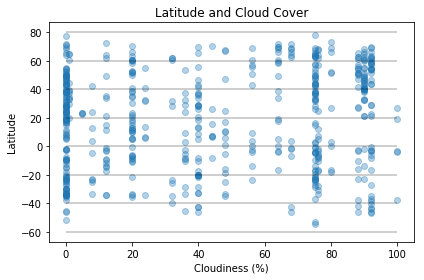

In [11]:
#create latitude & cloudiness scatter plot
cloudLatFig = plt.figure()
cloudLat = plt.subplot()
cloudLat.scatter(weatherTable["Cloud %"], weatherTable["Latitude"], alpha = .333)

#draw hlines for latitude
[plt.hlines(y, 0, 100, alpha=0.25) for y in y_ticks]

#titles and formatting
plt.title("Latitude and Cloud Cover")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.tight_layout()
plt.show()

#save plot as png
cloudLatFig.savefig("Output/clouds and temp.png", bbox_inches="tight")

### Latitude vs. Wind Speed Plot

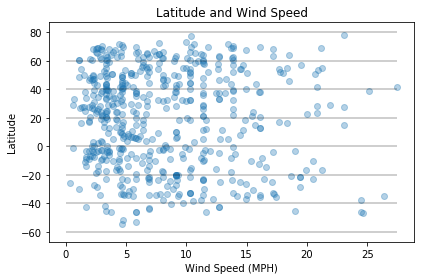

In [12]:
#create latitude and wind speed scatter plot
windLatFig = plt.figure()
windLat = plt.subplot()
windLat.scatter(weatherTable["Wind MPH"], weatherTable["Latitude"], alpha = .333)

#draw hlines for latitude
[plt.hlines(y, 0, max(weatherTable["Wind MPH"]), alpha=0.25) for y in y_ticks]

#titles and formatting
plt.title("Latitude and Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.tight_layout()
plt.show()

#save plot as png
windLatFig.savefig("Output/wind and temp.png", bbox_inches="tight")